# Movie Review Classification - A Binary Classification using IMDB Dataset

### Two class classification or Binary classification
- It is the most widely applied kind of machine learning problem.
- Here, we'll classify movie reviews as positive or negative, based on the text of the reviews

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the IMDB Dataset
from keras.datasets import imdb

In [3]:
# the num_words is used to set the number of datas that occur most frequently, so that the system can handle it effectively
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
print(train_data[0])

train_data[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# set of reviews : output column
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
n = int(input("Index no: "))
train_labels[n]

0

In [7]:
# as we restricetd the data, lets check whether it exceeds the limit?
max([max(sequence) for sequence in train_data])

9999

In [8]:
# quick decoding the selected reviews back to english
word_index = imdb.get_word_index()  #word_index is a dictionary mapping words to integer index 

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])  # reverse it, mapping integer indices to words

decoded_review = ''.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]     # decodes the reviews. Note that the indices are offset by 3 because 0,1 and 2 are reveresed indices for "padding","start of sequence", and "unknown"
)

### preparing the datas
- Words can't be feed into Neural network, we need to convert it into tensors.
- there's two types 
- 1. padding the lists - so that all of the datas have same length
- 2. One hot encoding - converts all datas into 0s and 1s

In [9]:
# preparing the datas
# lets gi with the latter solution to vectorize the data, which will be more easy to understand

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))    # creates all zero matrix of shape(len(sequences), dimensions)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.   # sets specific indices of results[i] to 1s
    return results

In [10]:
X_train = vectorize_sequences(train_data)   # vectorizing training data
X_test = vectorize_sequences(test_data)     # vectorizing test data

In [11]:
# let's check how it looks
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# vectorizing labels, straightforward
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
# now the datas can be fed into neural network

### building the neural network

In [14]:
# defining the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
# compiling the models

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',   # binary_crossentropy isn't a viable  choice but its a best choice while dealing with the models that output probabilities
              metrics=['accuracy'])

In [16]:
# configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [18]:
# validating the approach
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# training the model

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
# fitting the models
history=model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5047 - accuracy: 0.7922 - val_loss: 0.3845 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3152 - accuracy: 0.8989 - val_loss: 0.3123 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2413 - accuracy: 0.9216 - val_loss: 0.2914 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1940 - accuracy: 0.9387 - val_loss: 0.2897 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1641 - accuracy: 0.9485 - val_loss: 0.2771 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1381 - accuracy: 0.9578 - val_loss: 0.2917 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1201 - accuracy: 0.9640 - val_loss: 0.2978 - val_accuracy: 0.8837
Epoch 8/20
30

In [21]:
history_dict = history.history

In [22]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
# plotting the training and validation loss

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs=range(1,len(history_dict['accuracy'])+1)

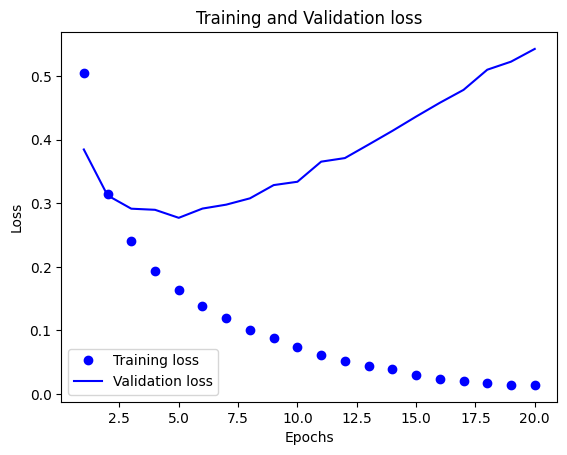

In [24]:
plt.plot(epochs,loss_values,'bo',label='Training loss')    # bo is for 'blue dot'
plt.plot(epochs,val_loss_values,'b',label='Validation loss')    # b is for solid blue line
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

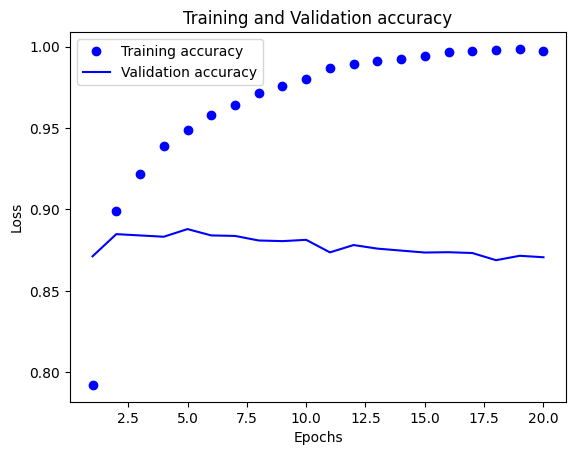

In [25]:
# plotting the training and validation accuracy

plt.clf()   # clears the figure

acc_values = history_dict['accuracy']
val_acc_loss = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_loss,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
# Retraining a model from scratch
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(X_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(X_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.5632 - accuracy: 0.7681
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.4611 - accuracy: 0.8801
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4240 - accuracy: 0.9066
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.4817 - accuracy: 0.8447


In [29]:
results

[0.48172277212142944, 0.8446800112724304]

In [30]:
# using trained network to generate prediction on new data

model.predict(X_test)

782/782 [==============================] - 1s 1ms/step


array([[0.13112943],
       [0.5514446 ],
       [0.22194767],
       ...,
       [0.0883833 ],
       [0.05146435],
       [0.25037363]], dtype=float32)